In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('../DATA/hearing_test.csv')

In [4]:
df.sample(5)

,age,physical_score,test_result
1099,60.0,18.6,0
3953,48.0,38.9,1
3623,50.0,35.9,1
4420,42.0,39.1,1
1579,61.0,34.1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot: xlabel='test_result', ylabel='count'>

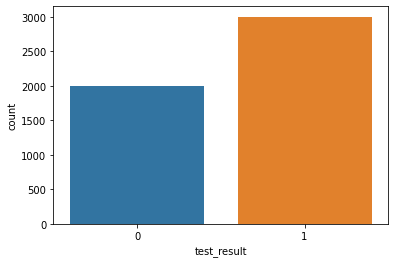

In [10]:
sns.countplot(df,x='test_result')

<AxesSubplot: xlabel='test_result', ylabel='age'>

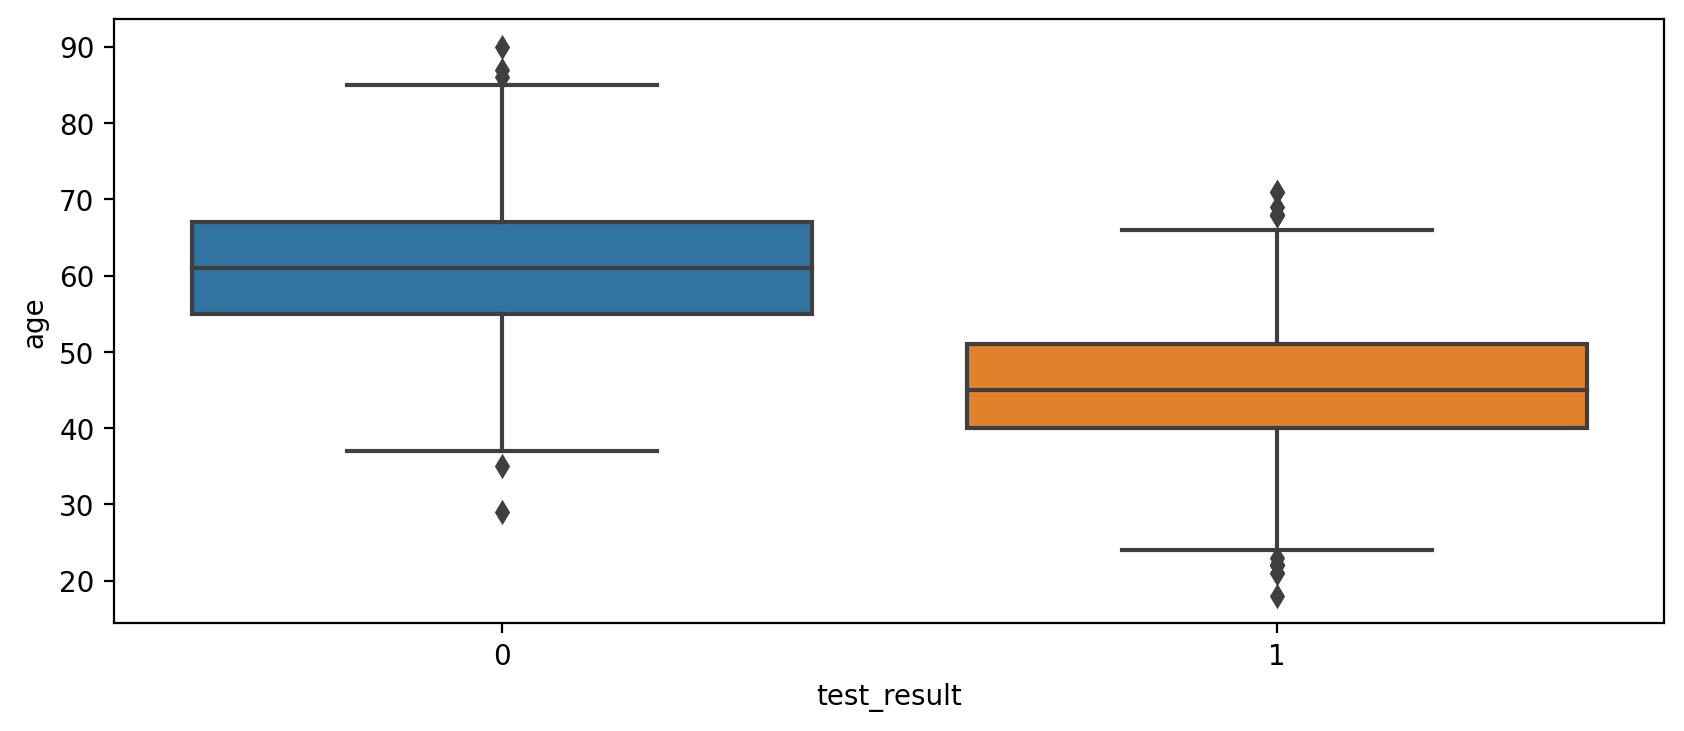

In [11]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot: xlabel='age', ylabel='physical_score'>

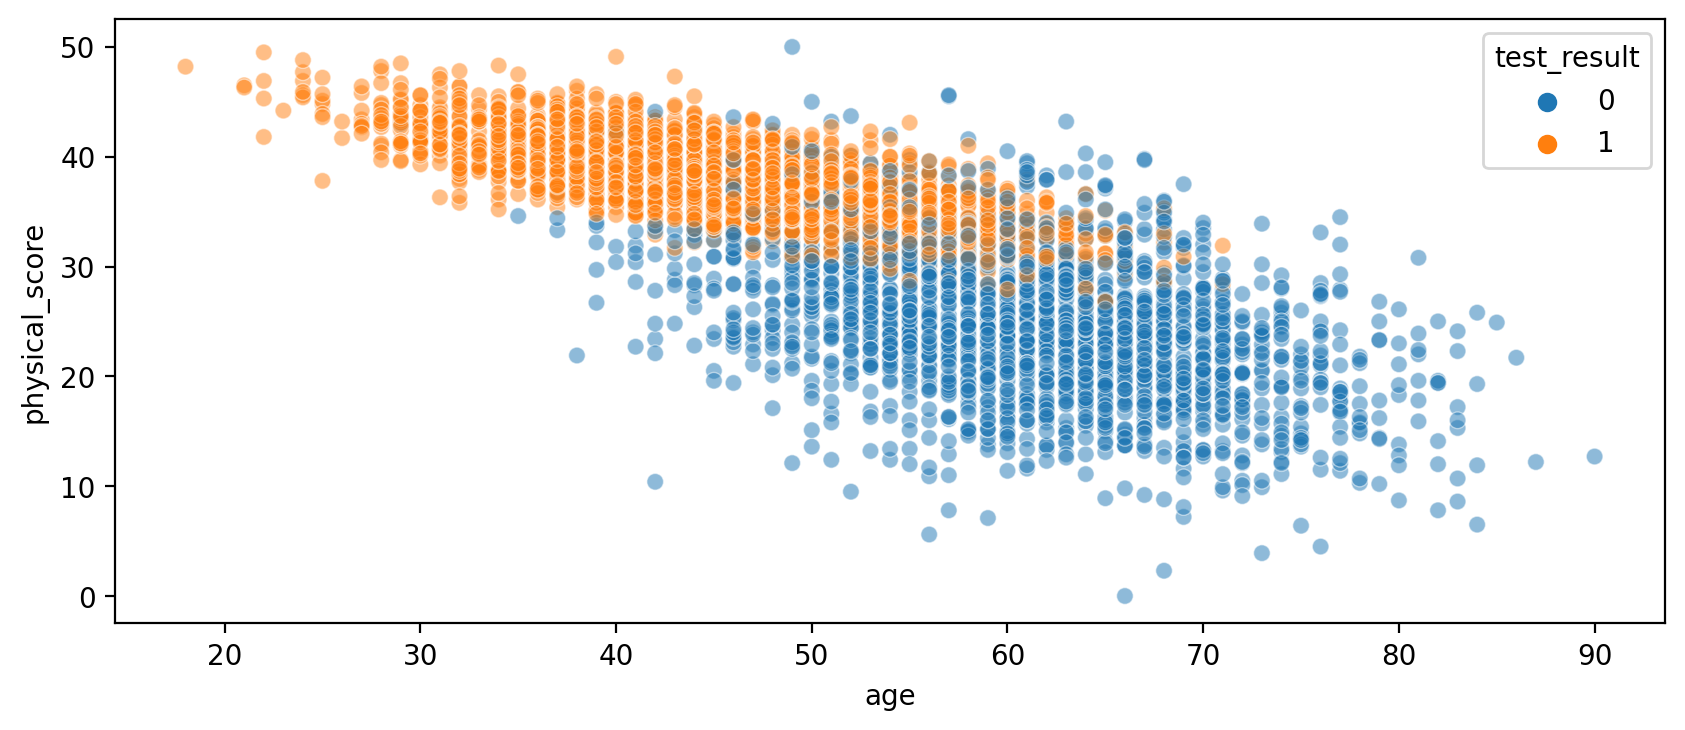

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5)

<Figure size 2000x800 with 0 Axes>

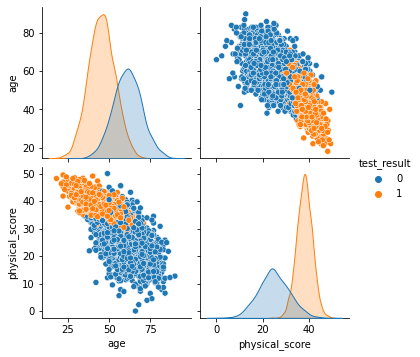

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.pairplot(df,hue='test_result')

<AxesSubplot: >

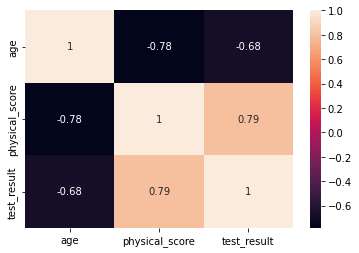

In [19]:
sns.heatmap(df.corr(),annot =True)

In [20]:
# 3d scatterplot

from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'test_result')

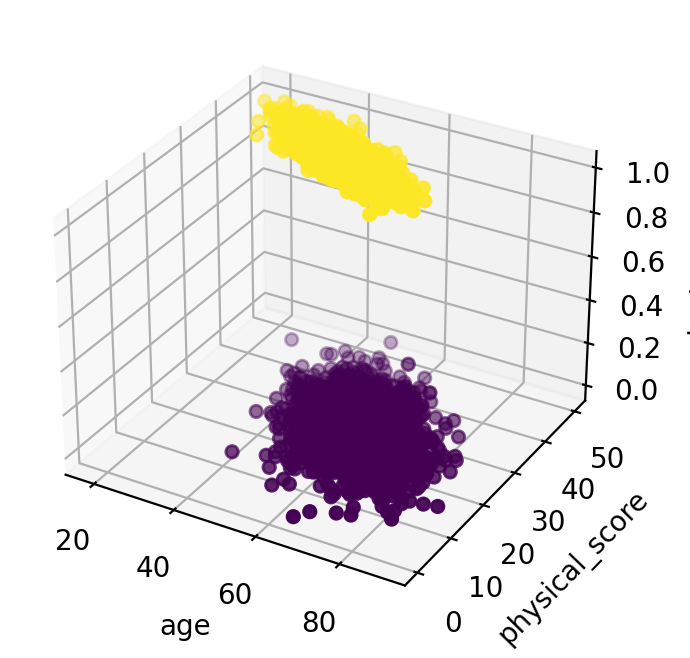

In [29]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'],c=df['test_result'])

ax.set_xlabel('age')
ax.set_ylabel('physical_score')
ax.set_zlabel('test_result')

In [30]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [31]:
X = df.drop('test_result',axis=1)

In [32]:
y= df['test_result']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [37]:
scaler = StandardScaler()

In [38]:
scaled_X_train =  scaler.fit_transform(X_train)

In [39]:
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model =LogisticRegression()

In [45]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [47]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [50]:
y_pred = log_model.predict(scaled_X_test)

In [51]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [52]:
y_pred = log_model.predict_proba(scaled_X_test)

In [53]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [54]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
y_pred = log_model.predict(scaled_X_test)

In [59]:
accuracy_score(y_test,y_pred)

0.93

In [60]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [61]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


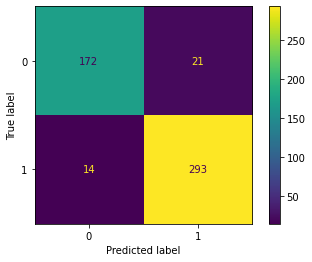

In [65]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [66]:
len(y_test)

500

In [68]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [69]:
# note : here  if the precision , recall and accuracy are closly same then we don't have imbalance in data

In [70]:
from sklearn.metrics import precision_score,recall_score

In [71]:
precision_score(y_test,y_pred)

0.9331210191082803

In [72]:
recall_score(y_test,y_pred)

0.9543973941368078

In [73]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


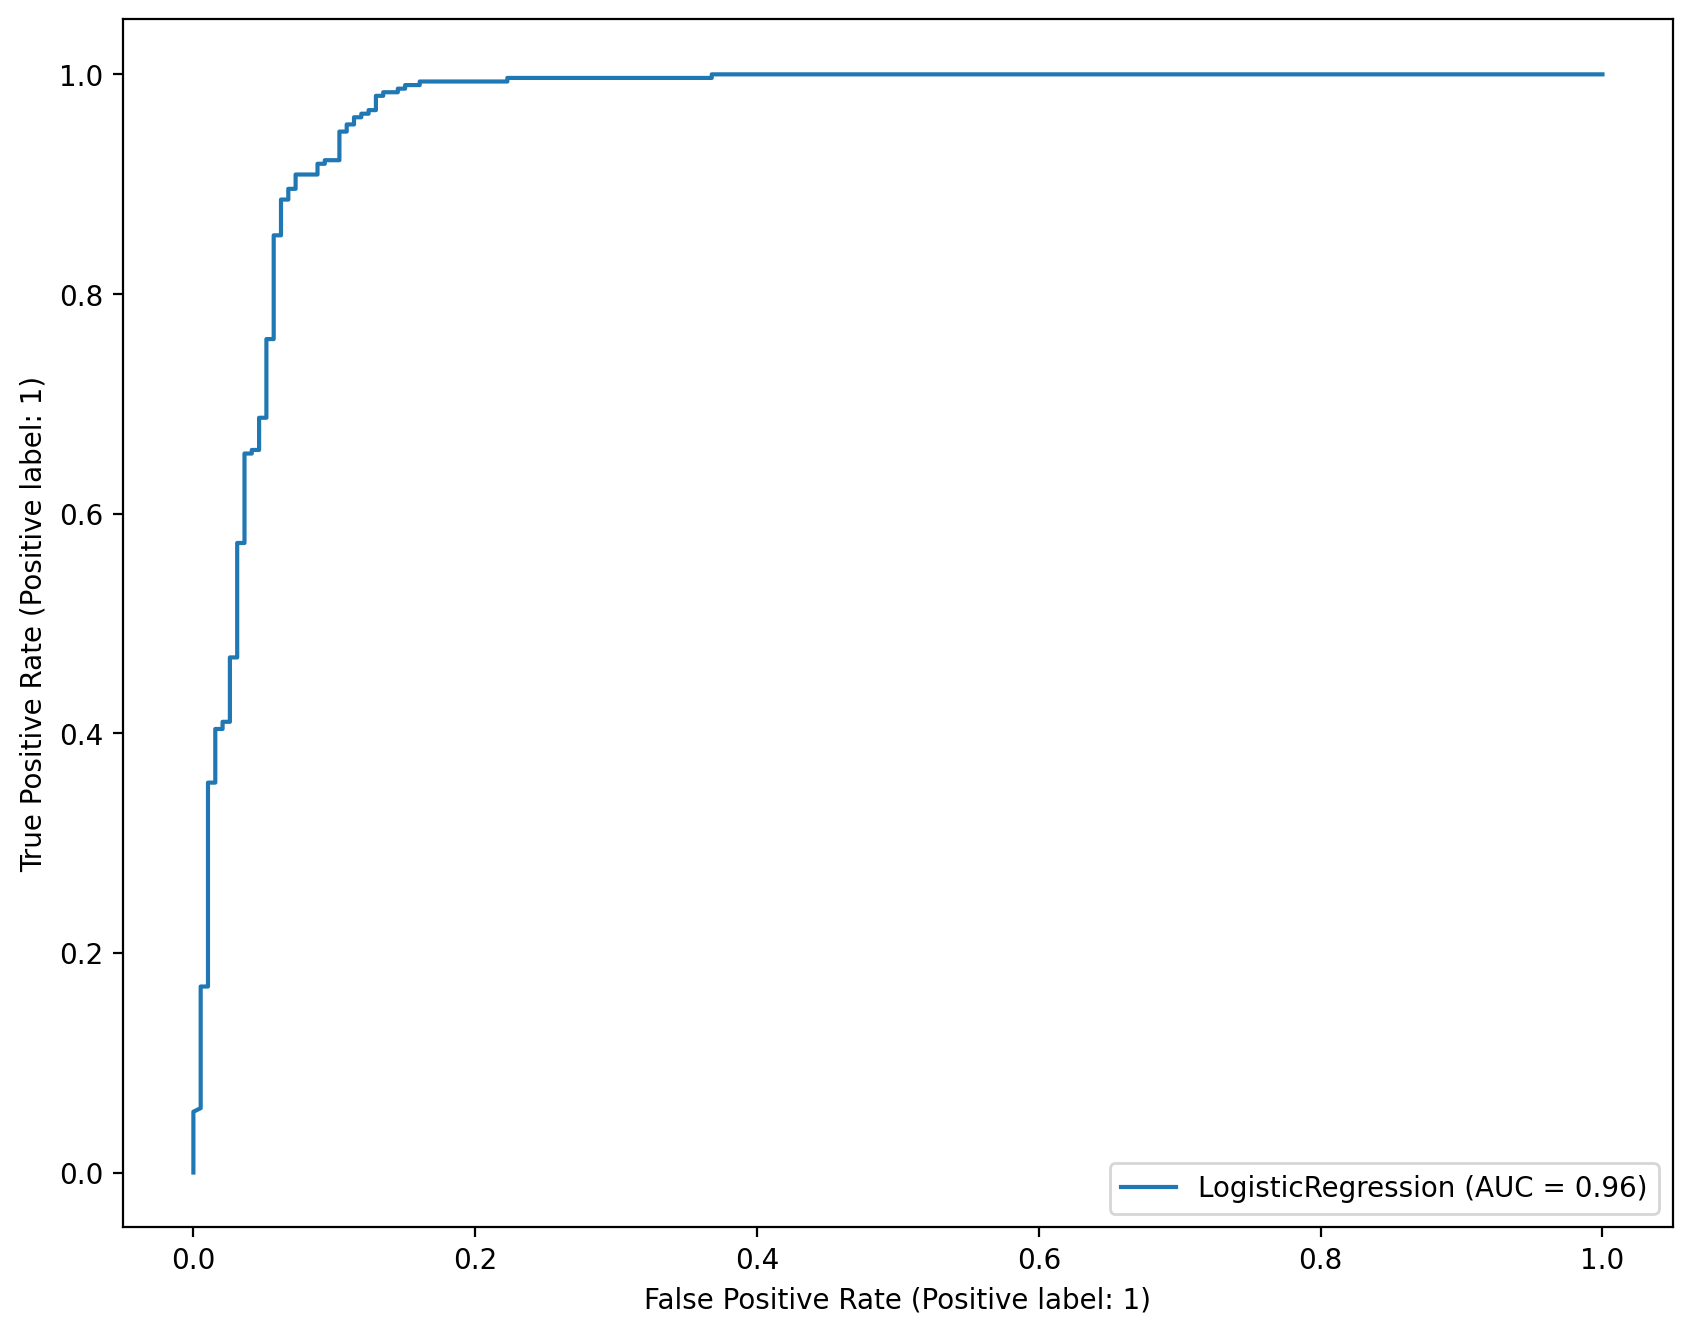

In [78]:
fig,ax = plt.subplots(figsize=(10,8),dpi=200)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax) # here we use ax =ax to connect the matplotlib commands to sklearn commands

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


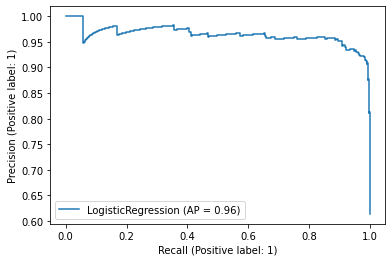

In [82]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [84]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [85]:
y_test[0] # that means, model predicts that it belongs to class 1 for 97.61%, 2.38% of beloning to class 0

1